In [13]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import matplotlib.axes as axt
import glob
import anndata
import bbknn



In [14]:
import scFates as scf

In [15]:
data_path = '../data/'

In [16]:
adata = sc.read_h5ad(data_path + 'combined.epi.anno.h5ad')

In [17]:
lineages = adata[adata.obs['cell_label'].isin(['Stem_1','DCS'])]
stem_dcs = lineages


inferring a principal curve --> parameters used 
    30 principal points, mu = 0.1, lambda = 0.01
    finished (0:00:04) --> added 
    .uns['epg'] dictionnary containing inferred elastic curve generated from elpigraph.
    .obsm['X_R'] soft assignment of cells to principal points.
    .uns['graph']['B'] adjacency matrix of the principal points.
    .uns['graph']['F'], coordinates of principal points in representation space.


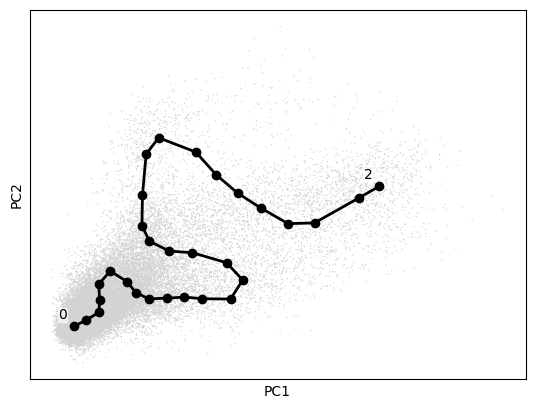

In [18]:
scf.tl.curve(stem_dcs,Nodes=30,use_rep="X_pca",ndims_rep=2)
scf.pl.graph(stem_dcs,basis="pca")


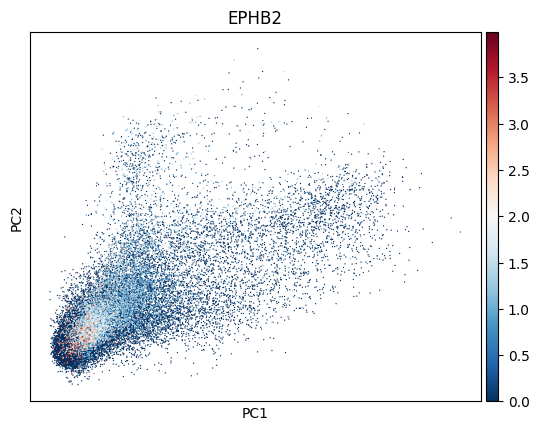

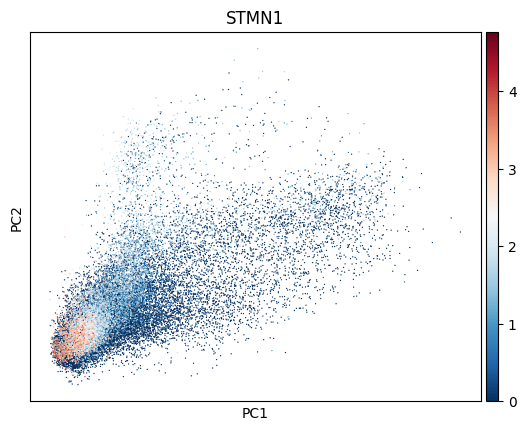

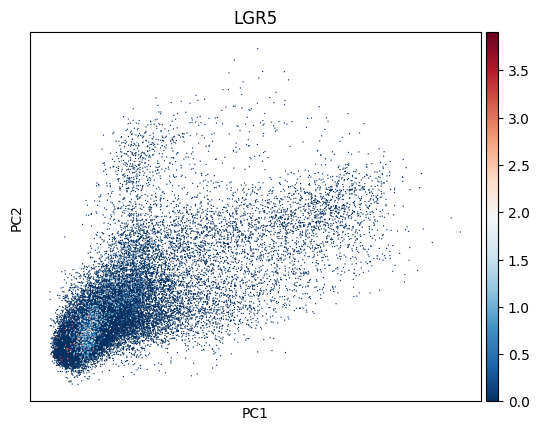

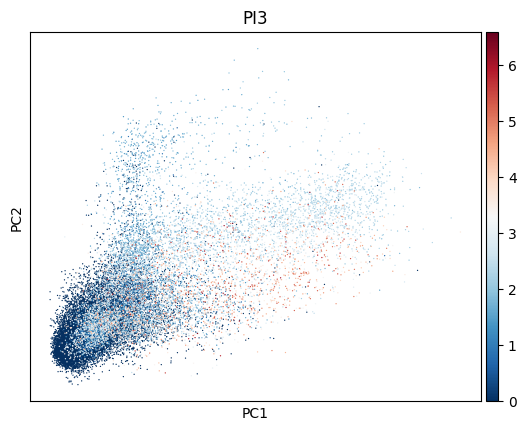

In [19]:
sc.pl.pca(stem_dcs,color="EPHB2",cmap="RdBu_r")
sc.pl.pca(stem_dcs,color="STMN1",cmap="RdBu_r")
sc.pl.pca(stem_dcs,color="LGR5",cmap="RdBu_r")
sc.pl.pca(stem_dcs,color="PI3",cmap="RdBu_r")

In [20]:
scf.tl.root(stem_dcs,"STMN1")

automatic root selection using STMN1 values
node 11 selected as a root --> added
    .uns['graph']['root'] selected root.
    .uns['graph']['pp_info'] for each PP, its distance vs root and segment assignment.
    .uns['graph']['pp_seg'] segments network information.


projecting cells onto the principal graph
    mappings:   0%|                                     | 0/100 [00:00<?, ?it/s]

Unable to determine R library path: Command '('/usr/lib/R/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 2.
Unable to determine R library path: Command '('/usr/lib/R/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 2.
Unable to determine R library path: Command '('/usr/lib/R/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 2.
Unable to determine R library path: Command '('/usr/lib/R/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 2.
Unable to determine R library path: Command '('/usr/lib/R/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 2.
Unable to determine R library path: Command '('/usr/lib/R/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 2.
Unable to determine R library path: Command '('/usr/lib/R/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LI

    mappings: 100%|███████████████████████████| 100/100 [01:38<00:00,  1.02it/s]
    finished (0:01:43) --> added
    .obs['edge'] assigned edge.
    .obs['t'] pseudotime value.
    .obs['seg'] segment of the tree assigned.
    .obs['milestones'] milestone assigned.
    .uns['pseudotime_list'] list of cell projection from all mappings.


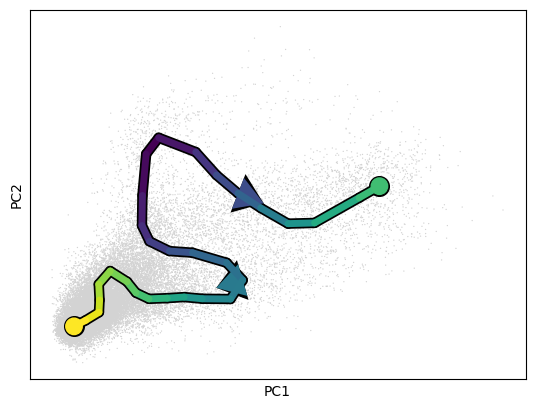

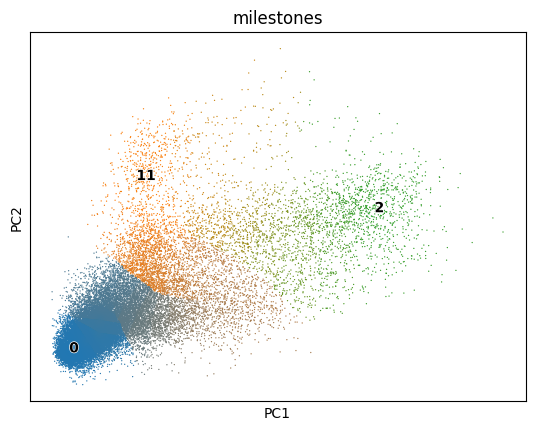

In [21]:
scf.tl.pseudotime(stem_dcs,n_jobs=20,n_map=100,seed=42)
scf.pl.trajectory(stem_dcs,basis="pca",arrows=True,arrow_offset=3)
scf.pl.milestones(stem_dcs,basis="pca",annotate=True)


In [23]:
scf.tl.linearity_deviation(stem_dcs,
                       	  start_milestone="0",
                      	  end_milestone="11",
                         n_jobs=20,plot=True,basis="pca")


Estimation of deviation from linearity


AttributeError: 'NoneType' object has no attribute 't'

test features for association with the trajectory
    single mapping : 100%|████████████████████| 291/291 [00:28<00:00, 10.32it/s]
    found 174 significant features (0:00:28) --> added
    .var['p_val'] values from statistical test.
    .var['fdr'] corrected values from multiple testing.
    .var['st'] proportion of mapping in which feature is significant.
    .var['A'] amplitue of change of tested feature.
    .var['signi'] feature is significantly changing along pseudotime.
    .uns['stat_assoc_list'] list of fitted features on the graph for all mappings.
reapplied filters, 252 significant features
fit features associated with the trajectory
    single mapping : 100%|████████████████████| 252/252 [00:52<00:00,  4.84it/s]
    finished (adata subsetted to keep only fitted features!) (0:00:53) --> added
    .layers['fitted'], fitted features on the trajectory for all mappings.
    .raw, unfiltered data.
Clustering features using fitted layer
    finished (0:00:02) --> added 
    .var['

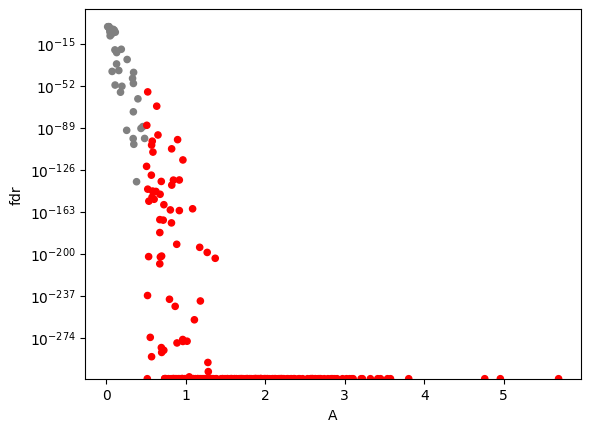

In [24]:
scf.tl.test_association(stem_dcs,n_jobs=20)
scf.tl.test_association(stem_dcs,reapply_filters=True,A_cut=.5)
scf.pl.test_association(stem_dcs)
scf.tl.fit(stem_dcs,n_jobs=20)
scf.tl.cluster(stem_dcs,n_neighbors=50,metric="correlation")


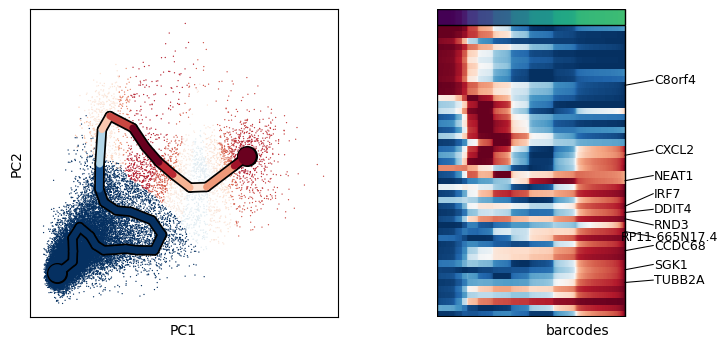

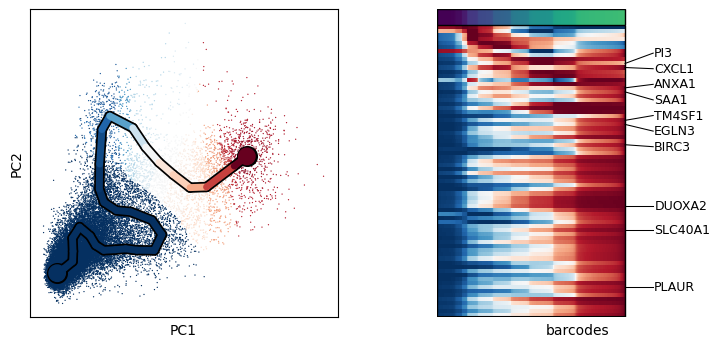

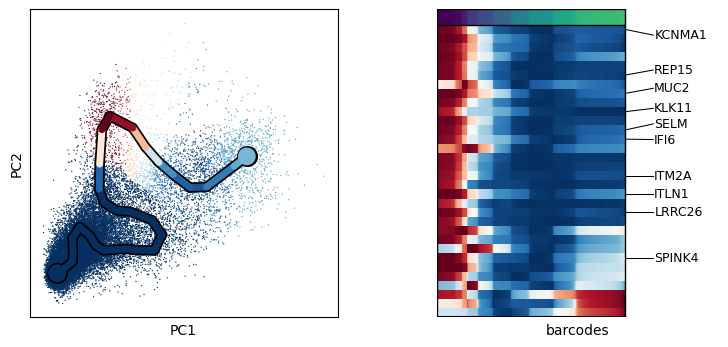

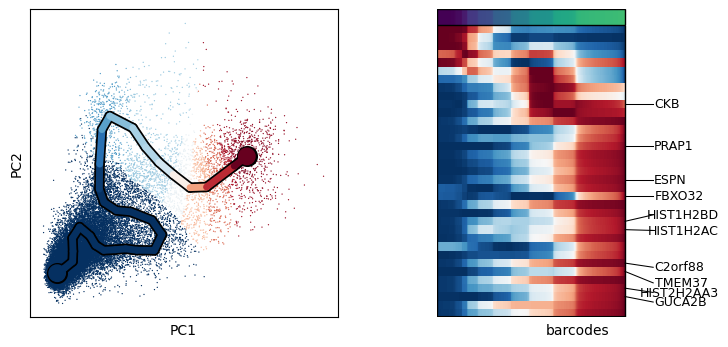

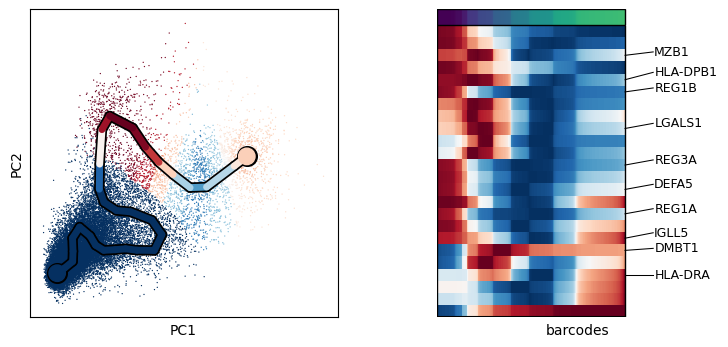

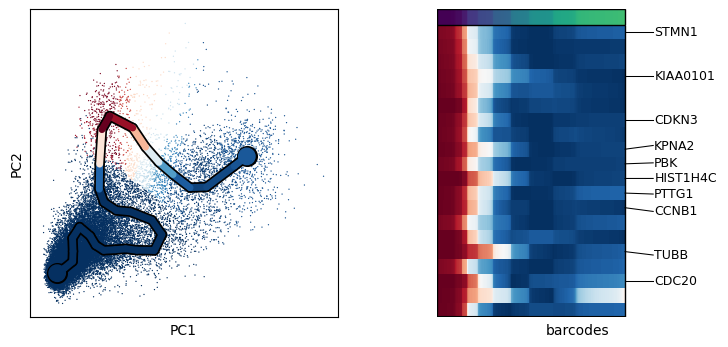

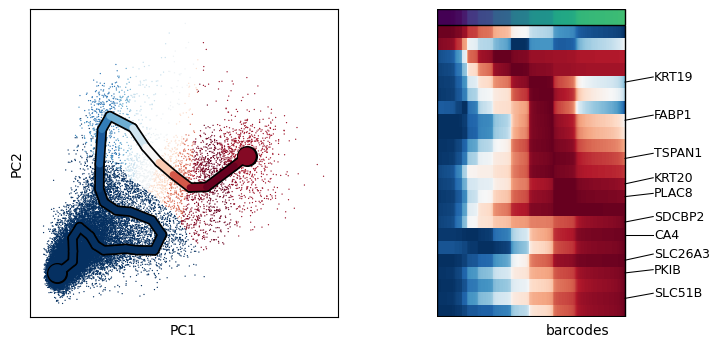

In [25]:
for c in stem_dcs.var["clusters"].unique():
    scf.pl.trends(stem_dcs,features=stem_dcs.var_names[stem_dcs.var.clusters==c],basis="pca",ordering="quantile",return_genes=True)


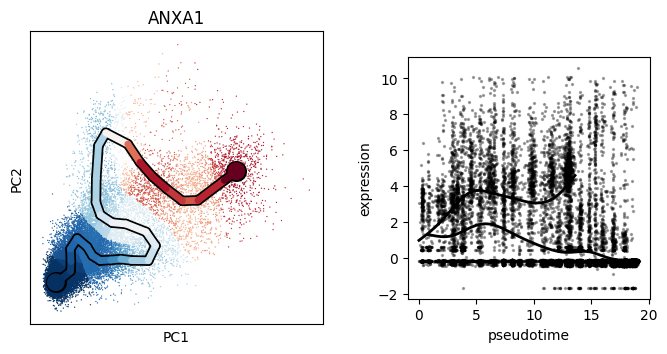

In [26]:
scf.pl.single_trend(stem_dcs,"ANXA1",basis="pca",color_exp="k")